In [1]:
import numpy as np
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap

from PIL import Image
from scipy import misc

from os import listdir
from os.path import isfile, join
from random import shuffle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

import tensorflow as tf

Using TensorFlow backend.


In [2]:
os.chdir('../mody/input/utkface-new')
os.chdir('UTKFace')

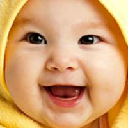

In [3]:
im =Image.open('1_0_0_20170110212704144.jpg.chip.jpg').resize((128,128))
im

In [4]:
onlyfiles = os.listdir()

In [5]:
len(onlyfiles)

23708

In [6]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [7]:
# Split the data into Classes

# Children (1-14) CLASS 0
# Youth (14-25) CLASS 1
# ADULTS (25-40) CLASS 2
# Middle age (40-60) CLASS 3
# Very Old (>60) CLASS 4

classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=25):
        classes.append(1)
    if (i>25) and (i<40):
        classes.append(2)
    if (i>=40) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

In [8]:
# convert image to vector

X_data =[]
for file in onlyfiles:
    face = misc.imread(file)
    face =cv2.resize(face, (32, 32) )
    X_data.append(face)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [9]:
X = np.squeeze(X_data)

In [10]:
X.shape

(23708, 32, 32, 3)

In [11]:
# normalize data
X = X.astype('float32')
X /= 255

In [12]:
classes[:10]

[3, 3, 2, 2, 2, 0, 2, 2, 2, 2]

In [13]:
categorical_labels = to_categorical(classes, num_classes=5)

In [14]:
categorical_labels[:10]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [15]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [16]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [17]:
model = tf.keras.Sequential()

In [18]:
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [19]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=25,
         validation_data=(x_valid, y_valid),)

Train on 15008 samples, validate on 7000 samples
Epoch 1/25
15008/15008 [==============================] - 34s 2ms/step - loss: 1.4171 - acc: 0.4044 - val_loss: 1.1762 - val_acc: 0.5161
Epoch 2/25
15008/15008 [==============================] - 33s 2ms/step - loss: 1.1522 - acc: 0.5087 - val_loss: 1.0647 - val_acc: 0.5637
Epoch 3/25
15008/15008 [==============================] - 33s 2ms/step - loss: 1.0688 - acc: 0.5448 - val_loss: 0.9797 - val_acc: 0.5769
Epoch 4/25
15008/15008 [==============================] - 34s 2ms/step - loss: 1.0323 - acc: 0.5566 - val_loss: 0.9544 - val_acc: 0.5870
Epoch 5/25
15008/15008 [==============================] - 33s 2ms/step - loss: 1.0088 - acc: 0.5671 - val_loss: 0.9405 - val_acc: 0.5956
Epoch 6/25
15008/15008 [==============================] - 34s 2ms/step - loss: 0.9787 - acc: 0.5815 - val_loss: 0.9175 - val_acc: 0.6059
Epoch 7/25
15008/15008 [==============================] - 33s 2ms/step - loss: 0.9607 - acc: 0.5900 - val_loss: 0.9352 - val_acc:

In [21]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

In [22]:
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6541176470588236


In [23]:
labels =["CHILD",  # index 0
        "YOUTH",      # index 1
        "ADULT",     # index 2 
        "MIDDLEAGE",        # index 3 
        "OLD",         # index 4
        ]

In [24]:
y_hat = model.predict(x_test)

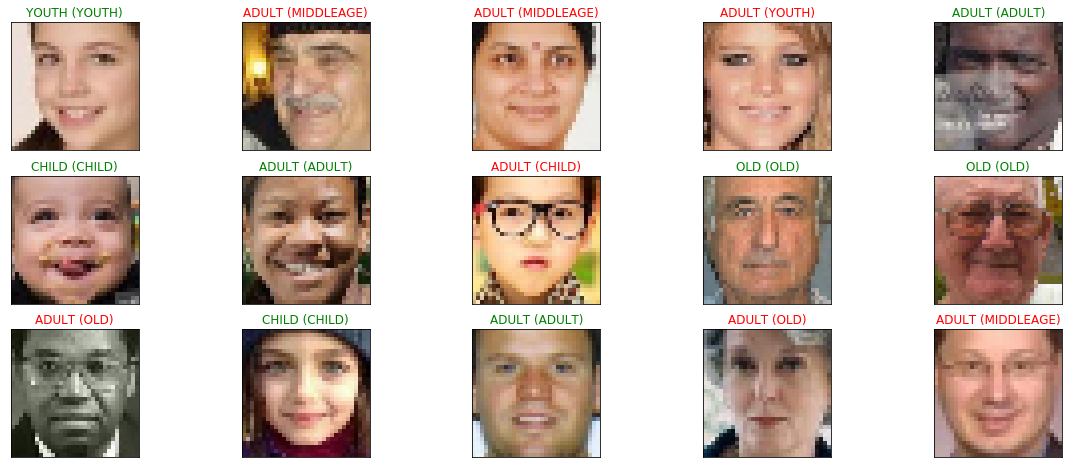

In [25]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()